# Statistics Project (M.Sc. Statistics for ML)

## Project Task 1: Building a Database

**Objective:**
To select a specific "population" of objects and build a statistical database for analysis.

**Requirements:**
1. **Population Selection:** - A distinct group of items (e.g., snacks, fruits, human performance data).
   - **Sample Size:** At least 36 objects. The total count must be a multiple of 4 (e.g., 100, 104).
   - **Sources:** Can be gathered manually or from existing databases (requires approval).

2. **Variables:**
   - The population must be measured by various parameters:
     - **Continuous:** Weight, height, length, etc.
     - **Categorical:** Color, type, etc.
     - **Nominal/Ordinal:** A ranking scale (e.g., Perfect, Good, Bad).

3. **Data Entry:** - All observations must be organized in a single Excel file.

The data we chose is the "bodyPerformance.csv" dataset from [Kaggle](https://www.kaggle.com/datasets/kukuroo3/body-performance-data?resource=download), the data has 13393 observations of individuals with various physical performance metrics. and 12 variables. from this we chose a subset of 100 observations for our analysis.
And we also chose the variables of 'age', 'gender', 'height', 'weight', 'body fat'. We also changed the 'gender' column values from 'M' and 'F' to '1' and '0' respectively to make it easier for analysis.

### Phase 3: Primary Statistical Analysis

**Goal:** Perform initial statistical calculations on **one central continuous variable** (calculating for more than one yields a bonus).

**Required Calculations:**
* **Measures of Central Tendency:**
    * **Mean:** The average value.
    * **Median:** The middle value when sorted.
    * **Mode:** The most frequent value.
    * **Mid-range:** (Max + Min) / 2.
* **Measures of Dispersion:**
    * **Range:** Max value - Min value.
    * **Variance:** The average squared deviation from the mean.
    * **Standard Deviation (SD):** The square root of the variance.
    * **Mean Absolute Deviation (MAD):** The average of the absolute differences from the mean.
* **Other:**
    * **Error Percentage/Proportions:** As relevant to the data.

In [1]:
# load the data
import pandas as pd
from networkx.algorithms.centrality import dispersion

data_path = "../database/human.csv"
df = pd.read_csv(data_path)

In [2]:
# show the shape of the data
df.shape

(100, 5)

In [3]:
df.head()

,age,gender,height,weight,bf
0,21.0,0,167.4,72.18,40.0
1,42.0,1,162.3,67.30,18.0
2,36.0,1,178.5,90.50,14.7
3,23.0,1,180.9,77.10,25.4
4,53.0,1,177.3,88.48,35.6


### Mean (Average)

Formula for Mean:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [6]:
# we will find the mean of each of the continuous variables
mean_values = df[['age', 'height', 'weight', 'bf']].mean()
# name the second column as 'Mean'
mean_values.name = 'Mean'
mean_values

age        36.93000
height    168.31600
weight     67.70460
bf         23.94307
Name: Mean, dtype: float64

### Median

Formula for Median:

- If n is odd: Median = value at position $(n + 1) / 2$
- If n is even: Median = average of values at positions $n / 2$ and $(n / 2) + 1$

In [7]:
median = df[['age', 'height', 'weight', 'bf']].median()
median.name = 'Median'
median

age        34.50
height    169.05
weight     67.45
bf         24.70
Name: Median, dtype: float64

### Mode

The mode is the value that appears most frequently in a data set.

In [8]:
mode = df[['age', 'height', 'weight', 'bf']].mode().iloc[0]
mode.name = 'Mode'
mode

age        21.0
height    167.2
weight     67.3
bf         25.1
Name: Mode, dtype: float64

### Mid-range

The mid-range is calculated as:

$$Mid\text{-}range = \frac{Max + Min}{2}$$


In [9]:
maxes = df[['age', 'height', 'weight', 'bf']].max()
mins = df[['age', 'height', 'weight', 'bf']].min()
mid_range = (maxes + mins) / 2
mid_range.name = 'Mid-range'
mid_range

age        42.50
height    167.15
weight     70.85
bf         24.50
Name: Mid-range, dtype: float64

### Summery Table of Central Tendency

In [10]:
central_tendency = pd.concat([mean_values, median, mode, mid_range], axis=1)
central_tendency

,Mean,Median,Mode,Mid-range
age,36.93000,34.50,21.0,42.50
height,168.31600,169.05,167.2,167.15
weight,67.70460,67.45,67.3,70.85
bf,23.94307,24.70,25.1,24.50


## Range

The range is calculated as:

$$Range = Max - Min$$

In [12]:
ranges = maxes - mins
ranges.name = 'Range'
ranges

age       43.0
height    32.1
weight    55.3
bf        34.6
Name: Range, dtype: float64

### Variance

The formula for Variance is:

$$Variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

In [13]:
variance = df[['age', 'height', 'weight', 'bf']].var()
variance.name = 'Variance'
variance

age       157.257677
height     63.911661
weight    143.930318
bf         53.909503
Name: Variance, dtype: float64

### Standard Deviation

The formula for Standard Deviation is:

$$SD = \sqrt{Variance}$$

In [14]:
stds = df[['age', 'height', 'weight', 'bf']].std()
stds.name = 'Standard Deviation'
stds

age       12.540242
height     7.994477
weight    11.997096
bf         7.342309
Name: Standard Deviation, dtype: float64

### Mean Absolute Deviation (MAD)

The formula for MAD is:

$$MAD = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$

In [17]:
# MAD is not directly available in pandas, we can calculate it manually
# we will do the MAD for 'age'
mad = (df[['age', 'height', 'weight', 'bf']] - mean_values[['age', 'height', 'weight', 'bf']]).abs().mean()
mad.name = 'Mean Absolute Deviation'
mad

age       10.600200
height     6.634720
weight     9.743892
bf         5.925762
Name: Mean Absolute Deviation, dtype: float64

### Summery Table of Dispersion

In [18]:
dispersion_df = pd.concat([ranges, variance, stds, mad], axis=1)
dispersion_df

,Range,Variance,Standard Deviation,Mean Absolute Deviation
age,43.0,157.257677,12.540242,10.600200
height,32.1,63.911661,7.994477,6.634720
weight,55.3,143.930318,11.997096,9.743892
bf,34.6,53.909503,7.342309,5.925762


### Summery Table of Central Tendency and Dispersion

In [19]:
summary_df = pd.concat([central_tendency, dispersion_df], axis=1)
summary_df

,Mean,Median,Mode,Mid-range,Range,Variance,Standard Deviation,Mean Absolute Deviation
age,36.93000,34.50,21.0,42.50,43.0,157.257677,12.540242,10.600200
height,168.31600,169.05,167.2,167.15,32.1,63.911661,7.994477,6.634720
weight,67.70460,67.45,67.3,70.85,55.3,143.930318,11.997096,9.743892
bf,23.94307,24.70,25.1,24.50,34.6,53.909503,7.342309,5.925762


### Phase 4: Frequency Distribution & Grouped Analysis

**Goal:** Organize the raw data into classes (groups) to analyze the frequency distribution.

**Steps:**
1.  **Create a Frequency Table:**
    * Define **Class Width** and create classes (bins).
    * List **Apparent Limits** and **Real Limits (Boundaries)**.
    * Calculate **Frequencies** for each class.
    * Calculate **Cumulative Frequency**.
    * Calculate **Relative Frequency** (proportion of total) and **Cumulative Relative Frequency**.

2.  **Calculate Parameters for Grouped Data:**
    * **Grouped Median:** Estimated using interpolation within the median class.
    * **Interquartile Range (IQR):** The difference between the 3rd Quartile (Q3/P75) and 1st Quartile (Q1/P25).
    * **Percentiles:** Specifically calculate the **10th Percentile (P10)** and the **90th Percentile (P90)**.

We will do the frequency distribution for the 'age' variable.

In [22]:
binned_age = pd.cut(df['age'], bins=10)
frequency_table = binned_age.value_counts().sort_index()
# add a cumulative frequency column
cumulative_frequency = frequency_table.cumsum()
# add a relative frequency column
relative_frequency = frequency_table / frequency_table.sum()
# add a cumulative relative frequency column
cumulative_relative_frequency = relative_frequency.cumsum()
frequency_table = pd.DataFrame({
    'Frequency': frequency_table,
    'Cumulative Frequency': cumulative_frequency,
    'Relative Frequency': relative_frequency,
    'Cumulative Relative Frequency': cumulative_relative_frequency
})
frequency_table

,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Frequency
age,,,,
"(20.957, 25.3]",21,21,0.21,0.21
"(25.3, 29.6]",16,37,0.16,0.37
"(29.6, 33.9]",12,49,0.12,0.49
"(33.9, 38.2]",12,61,0.12,0.61
"(38.2, 42.5]",6,67,0.06,0.67
"(42.5, 46.8]",8,75,0.08,0.75
"(46.8, 51.1]",11,86,0.11,0.86
"(51.1, 55.4]",2,88,0.02,0.88
"(55.4, 59.7]",4,92,0.04,0.92


### Parameters for Grouped Data

#### Median

Median for grouped data is calculated using the formula:

$$Median = L + \left(\frac{\frac{n}{2} - CF}{f}\right) \times h$$

Where:
- $L$ = Lower boundary of the median class
- $n$ = Total number of observations
- $CF$ = Cumulative frequency of the class before the median class
- $f$ = Frequency of the median class
- $h$ = Class width

In [27]:
# median
n = frequency_table['Frequency'].sum()
median_class = frequency_table[frequency_table['Cumulative Frequency'] >= n/2].index[0]
L = median_class.left
f = frequency_table.loc[median_class, 'Frequency']
CF = frequency_table[frequency_table.index < median_class]['Frequency'].sum()
h = median_class.right - median_class.left
grouped_median = L + ((n/2 - CF) / f) * h
print(f"Grouped median: {grouped_median:.2f}")

Grouped median: 34.26


#### Interquartile Range (IQR)

For grouped data, Q1 and Q3 are calculated using the formulas:

$$Q1 = L1 + \left(\frac{(n/4) - CF1}{f1}\right) \times h$$
$$Q3 = L3 + \left(\frac{(3n/4) - CF3}{f3}\right) \times h$$

Where:
- $L1$, $L3$ = Lower boundaries of the Q1 and Q3 classes
- $CF1$, $CF3$ = Cumulative frequencies before the Q1 and Q3 classes
- $f1$, $f3$ = Frequencies of the Q1 and Q3 classes
- $h$ = Class width
- $n$ = Total number of observations

In [28]:
q25 = n * 0.25
q75 = n * 0.75
# find Q1 class
q1_class = frequency_table[frequency_table['Cumulative Frequency'] >= q25].index
q1_class = q1_class[0]
L1 = q1_class.left
f1 = frequency_table.loc[q1_class, 'Frequency']
CF1 = frequency_table[frequency_table.index < q1_class]['Frequency'].sum()
h1 = q1_class.right - q1_class.left
Q1 = L1 + ((q25 - CF1) / f1) * h
# find Q3 class
q3_class = frequency_table[frequency_table['Cumulative Frequency'] >= q75].index
q3_class = q3_class[0]
L3 = q3_class.left
f3 = frequency_table.loc[q3_class, 'Frequency']
CF3 = frequency_table[frequency_table.index < q3_class]['Frequency'].sum()
h3 = q3_class.right - q3_class.left
Q3 = L3 + ((q75 - CF3) / f3) * h
IQR = Q3 - Q1
print(f"IQR: {IQR:.2f}")

IQR: 20.43


#### Percentiles (P10 and P90)

Formula for Percentiles:

$$P_k = L + \left(\frac{(k \cdot n / 100) - CF}{f}\right) \times h$$

Where:
- $P_k$ = k-th percentile
- $L$ = Lower boundary of the percentile class
- $n$ = Total number of observations
- $CF$ = Cumulative frequency before the percentile class
- $f$ = Frequency of the percentile class

In [29]:
p10 = n * 0.10
p90 = n * 0.90
# find P10 class
p10_class = frequency_table[frequency_table['Cumulative Frequency'] >= p10].index
p10_class = p10_class[0]
L10 = p10_class.left
f10 = frequency_table.loc[p10_class, 'Frequency']
CF10 = frequency_table[frequency_table.index < p10_class]['Frequency'].sum()
h10 = p10_class.right - p10_class.left
P10 = L10 + ((p10 - CF10) / f10) * h
# find P90 class
p90_class = frequency_table[frequency_table['Cumulative Frequency'] >= p90].index
p90_class = p90_class[0]
L90 = p90_class.left
f90 = frequency_table.loc[p90_class, 'Frequency']
CF90 = frequency_table[frequency_table.index < p90_class]['Frequency'].sum()
h90 = p90_class.right - p90_class.left
P90 = L90 + ((p90 - CF90) / f90) * h
print(f"P10: {P10:.2f}, P90: {P90:.2f}")

P10: 23.00, P90: 57.55


### Summery Table of Grouped Data Parameters

In [30]:
grouped_param_df = pd.DataFrame({
    'Grouped Median': [grouped_median],
    'IQR': [IQR],
    'P10': [P10],
    'P90': [P90]
})
grouped_param_df

,Grouped Median,IQR,P10,P90
0,34.258333,20.425,23.004619,57.55


## Phase 5: Visualization

**Goal:** Present the data visually using specific chart types.

**Required Charts:**
1.  **Bar / Column Chart:** Best for categorical data or simple comparisons.
2.  **Histogram:** To show the distribution of the continuous variable (based on the frequency table from Phase 4).
3.  **Pie Chart:** To show the relative proportions of categorical parts (e.g., the "Nominal Classification" groups).
4.  **Frequency Polygon:** A line graph plotted using the midpoints of the histogram bars.
5.  **Ogive (Cumulative Frequency Graph):** A line graph showing the cumulative frequency accumulation.

In [31]:
import matplotlib.pyplot as plt

In [33]:
# set the style to be 'ggplot'
plt.style.use('ggplot')

### Bar Plot for `gender`

In [37]:
# plot a bar chart for 'gender'
map_gender_to_str = {0 : 'Female', 1 : 'Male'}
df['gender_str'] = df['gender'].map(map_gender_to_str)

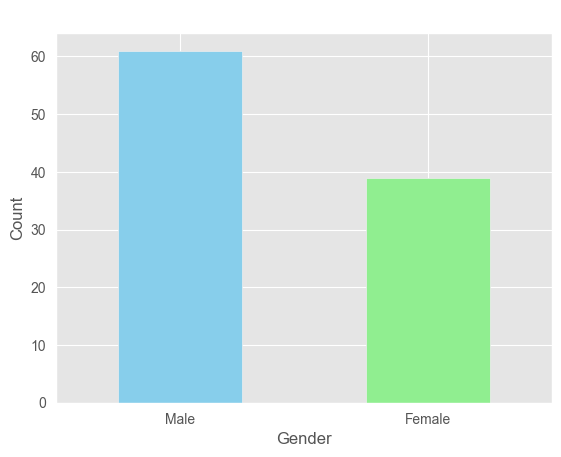

In [38]:
# plot the bar chart of grouped age, height, weight per gender
gender_counts = df['gender_str'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Histogram

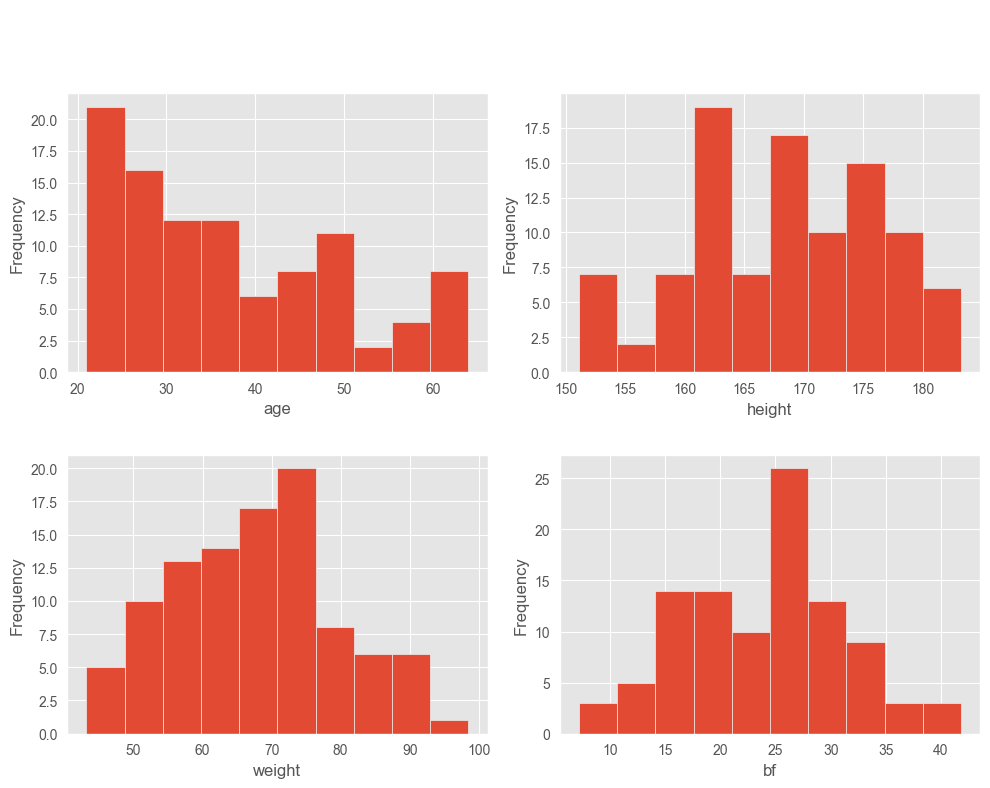

In [36]:
# plot a histogram for 'age', 'height', 'weight', 'bf', 'gender'
cols = ['age', 'height', 'weight', 'bf']
axes = df[cols].hist(bins=10, figsize=(10, 8))

# ensure we have a flat iterable of axes
if hasattr(axes, "ravel"):
    axes_iter = axes.ravel()
else:
    axes_iter = [axes]

for ax, col in zip(axes_iter, cols):
    ax.set_title(col)          # set the variable name as the subplot title
    ax.set_xlabel(col)         # optional: label x-axis with variable name
    ax.set_ylabel('Frequency') # optional: label y-axis

plt.suptitle('Histograms of Continuous Variables')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the suptitle
plt.show()

### Pie chart

We will create a pie chart for height groups.

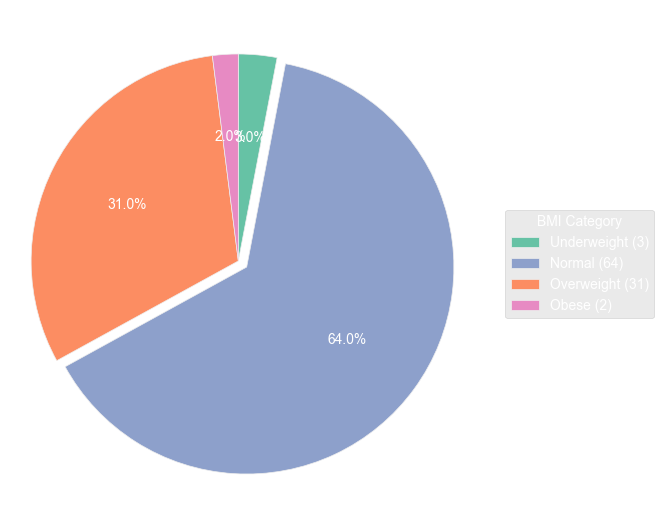

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ensure height in meters
h = df['height'].copy()
if h.median() > 3:
    h = h / 100.0

# compute BMI and categories
df['BMI'] = df['weight'] / (h ** 2)
def bmi_category(b):
    if b < 18.5:
        return 'Underweight'
    if b < 25:
        return 'Normal'
    if b < 30:
        return 'Overweight'
    return 'Obese'
df['BMI_cat'] = df['BMI'].apply(bmi_category)

# fixed order for categories and counts
order = ['Underweight', 'Normal', 'Overweight', 'Obese']
counts = df['BMI_cat'].value_counts().reindex(order).fillna(0)

colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3']
explode = [0.05 if (v == counts.max() and v > 0) else 0 for v in counts]

# plot pie (labels omitted so legend shows mapping)
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    counterclock=False
)
ax.set_title('BMI Category Proportions')
ax.axis('equal')

# legend with colored patches showing class and count
patches = [
    mpatches.Patch(facecolor=c, label=f"{cat} ({int(counts[cat])})")
    for c, cat in zip(colors, order)
]
ax.legend(handles=patches, title='BMI Category', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


### Frequency Polygon + Ogive

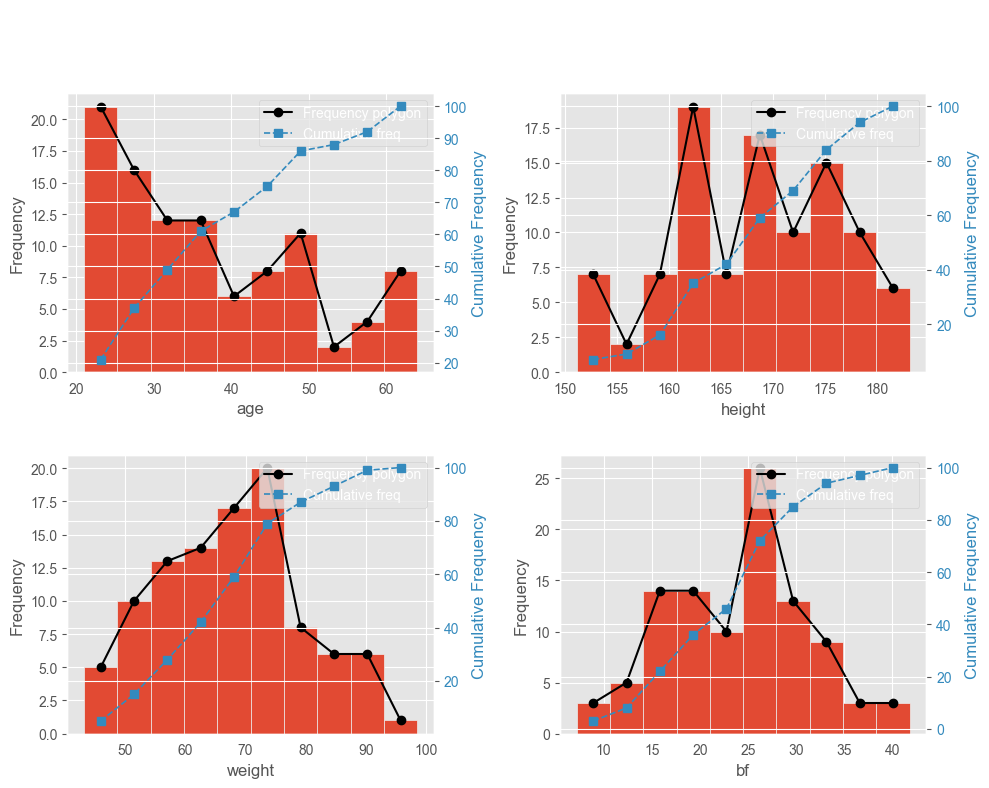

In [48]:
import numpy as np
import matplotlib.pyplot as plt

cols = ['age', 'height', 'weight', 'bf']
axes = df[cols].hist(bins=10, figsize=(10, 8))

# ensure we have a flat iterable of axes
if hasattr(axes, "ravel"):
    axes_iter = axes.ravel()
else:
    axes_iter = [axes]

for ax, col in zip(axes_iter, cols):
    # compute histogram counts and bin edges (same bins used for the bars)
    series = df[col].dropna()
    counts, edges = np.histogram(series, bins=10)
    midpoints = (edges[:-1] + edges[1:]) / 2

    # frequency polygon: line through midpoints
    line1, = ax.plot(midpoints, counts, color='black', marker='o', linestyle='-', linewidth=1.5, label='Frequency polygon')

    # cumulative frequency on secondary y-axis
    ax2 = ax.twinx()
    cum = counts.cumsum()
    line2, = ax2.plot(midpoints, cum, color='C1', marker='s', linestyle='--', linewidth=1.2, label='Cumulative freq')
    ax2.set_ylabel('Cumulative Frequency', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')

    # labels and title
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    # combined legend
    ax.legend(handles=[line1, line2], loc='upper right')

plt.suptitle('Histograms with Frequency Polygon and Cumulative Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
